## Carregando os dados de reserva de hotel dos clientes

In [8]:
import pandas as pd

url_hotel = "https://raw.githubusercontent.com/alura-cursos/selecao-de-features/main/dados/hotel.csv"
df_hotel = pd.read_csv(url_hotel)
df_hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1


In [9]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

Existem valores nulos?

In [10]:
count_null_values = df_hotel.isnull().sum().sum()
print(f"Número de valores nulos: {count_null_values}")

Número de valores nulos: 0


A variável alvo está desbalanceada?

In [11]:
df_hotel["booking_status"].value_counts(normalize=True)

booking_status
0    0.5
1    0.5
Name: proportion, dtype: float64

## Treinamento base

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5122
           1       0.93      0.91      0.92      5122

    accuracy                           0.92     10244
   macro avg       0.92      0.92      0.92     10244
weighted avg       0.92      0.92      0.92     10244



Matplotlib is building the font cache; this may take a moment.


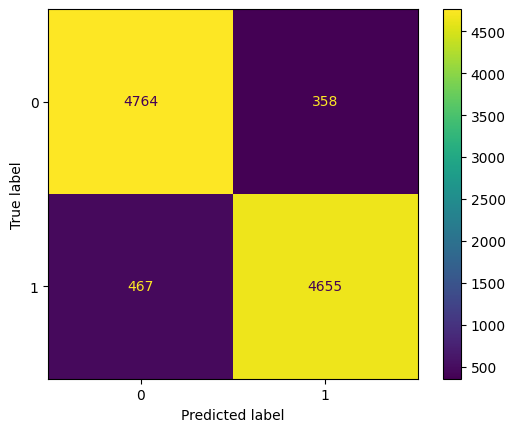

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

SEED = 0

x = df_hotel.drop(columns=["booking_status"])
y = df_hotel["booking_status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=SEED)

random_forest = RandomForestClassifier(random_state=SEED)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)